## The basic steps for a regression task using GridSearchCV

### step-1: load data and clean data ( handle missing values)

In [1]:
#load data
#clean data: drop or interpolate using Pandas

### step-2: preprocess data

In [2]:
#normalization, reshape, etc if necessary

Let's generate some random data, so we can discuss the next steps

In [3]:
#random number generator
import numpy as np
rng=np.random.RandomState(0)

In [4]:
num_samples=3000
num_features=3
X=rng.rand(num_samples, num_features)
X.shape

(3000, 3)

In [5]:
#assume there is only one target/output in this task
num_outputs=1
Y=X.mean(axis=1, keepdims=True) + 0.001*rng.randn(num_samples, num_outputs)
Y.shape

(3000, 1)

In [6]:
# for a single-target/output task, we can reshape Y to a 1D array
Y=Y.reshape(-1)
Y.shape

(3000,)

### step-3: train-validation-test
analogy <br>
training set: homework <br>
validation set: moc exam  <br>
test set:       final exam  <br>

In [7]:
from sklearn.model_selection import train_test_split
#split the data (X,Y) into a training set (X_train, Y_train) and a test set (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(2400, 3)

### step-4: choose a machine learning model for regression

In [9]:
from sklearn.neighbors import KNeighborsRegressor
# model =KNeighborsRegressor(n_neighbors=???)

### step-5: find the optimal hyper-parameter(s) of the model using training-validation

In [10]:
#create a list of possible values of the parameter n_neighbors
n_list=np.arange(1, 100, 5)

In [11]:
#create a dictionary of model hyper-parameter(s)
#the KNeighborsRegressor model has only one hyper-parameter: n_neighbors
param_grid = {'n_neighbors':n_list}

In [12]:
#in general, a model can have more than one hyper-parameter
#assume a model has 3 hyper-parameters: parameter1, parameter2, and parameter3
# param_grid = {'parameter1': list1,
#               'parameter2': list2,
#               'parameter3': list3,
#               'random_state':[0] # if the model has the random_state parameter
#}

In [13]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error', # a better model has a better score (-MSE)
                  cv=5) #set cv=5, then it will do 5-fold cross-validation

`scoring` is 'neg_mean_squared_error': the best model has the highest score (smallest error) <br>
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [14]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='neg_mean_squared_error')

In [15]:
gs.cv_results_

{'mean_fit_time': array([0.0008235 , 0.        , 0.00017343, 0.00019855, 0.00059142,
        0.00020003, 0.        , 0.00118999, 0.00072851, 0.00320458,
        0.00059614, 0.00010066, 0.        , 0.        , 0.        ,
        0.        , 0.003332  , 0.        , 0.00040092, 0.        ]),
 'std_fit_time': array([0.001647  , 0.        , 0.00034685, 0.00039711, 0.00048329,
        0.00040007, 0.        , 0.00143112, 0.0003893 , 0.0059264 ,
        0.0004868 , 0.00020132, 0.        , 0.        , 0.        ,
        0.        , 0.00515827, 0.        , 0.00049103, 0.        ]),
 'mean_score_time': array([0.00024137, 0.00323591, 0.        , 0.00414677, 0.00220504,
        0.00181785, 0.00312953, 0.00298381, 0.00180006, 0.00184236,
        0.00407906, 0.00313606, 0.00312438, 0.00636339, 0.00310082,
        0.00627341, 0.00370836, 0.00412745, 0.00666671, 0.0062499 ]),
 'std_score_time': array([0.00048275, 0.00647182, 0.        , 0.0058326 , 0.00039944,
        0.00098127, 0.00625906, 0.000108

In [16]:
#  mse on validation set,  score = -mse
mse_val_list = -gs.cv_results_['mean_test_score'] #"test" is validation
mse_val_list

array([0.00027288, 0.00013881, 0.00014263, 0.00016192, 0.00018161,
       0.00020779, 0.00023304, 0.00025838, 0.00028512, 0.00031298,
       0.0003427 , 0.00037416, 0.00040816, 0.00044182, 0.00047752,
       0.00051248, 0.00054756, 0.00057841, 0.00061486, 0.00065056])

In [17]:
np.array(mse_val_list)

array([0.00027288, 0.00013881, 0.00014263, 0.00016192, 0.00018161,
       0.00020779, 0.00023304, 0.00025838, 0.00028512, 0.00031298,
       0.0003427 , 0.00037416, 0.00040816, 0.00044182, 0.00047752,
       0.00051248, 0.00054756, 0.00057841, 0.00061486, 0.00065056])

Text(0, 0.5, 'mse')

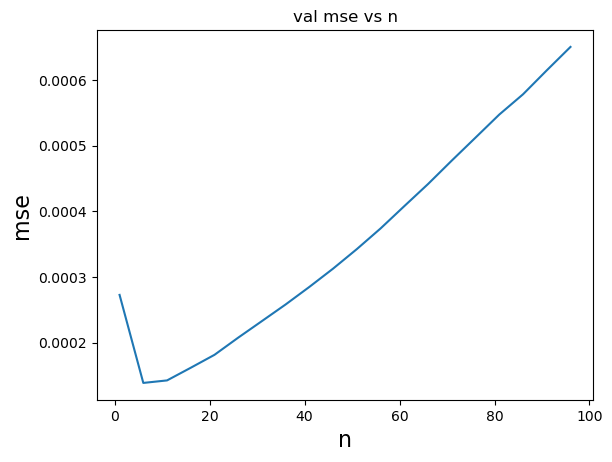

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(n_list, mse_val_list)
ax.set_title('val mse vs n')
ax.set_xlabel('n', fontsize=16)
ax.set_ylabel('mse', fontsize=16)

In [19]:
# the best parameter leads to the smallest mse on the validation set
n_best=n_list[np.argmin(mse_val_list)]
n_best

6

In [20]:
#we can get the best parameter(s) directly from gs
gs.best_params_ 

{'n_neighbors': 6}

In [21]:
#we could train the model again using the best parameter
#   model =KNeighborsRegressor(n_neighbors=n_best)
#   model.fit(X_train, Y_train)
# note: we can directly use gs.best_estimator_
# it is the best model
model_best=gs.best_estimator_
model_best

KNeighborsRegressor(n_neighbors=6)

In [22]:
#measure the mse on the training set
Y_train_pred = model_best.predict(X_train)
mse_train=np.mean((Y_train_pred-Y_train)**2)
mse_train

8.432631889594933e-05

### step-6: evaluate the model on the test set (the "final exam")

In [23]:
#measure the mse on the test set
Y_test_pred = model_best.predict(X_test)
mse_test=np.mean((Y_test_pred-Y_test)**2)
mse_test

0.00011341789731960122

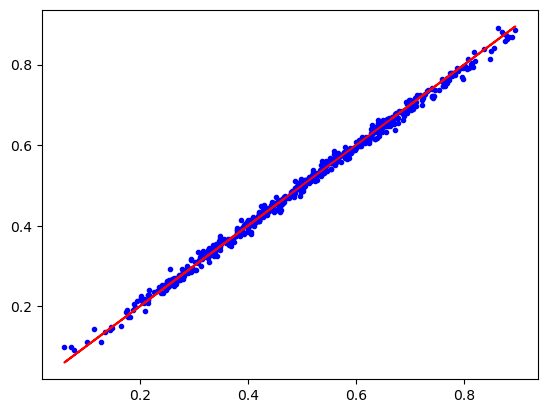

In [24]:
# plot Y_test_pred vs Y_test
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred, '.b')
#the 45-degree line
ax.plot(Y_test, Y_test, '-r')
#if there is no error (mse_test is 0), then the blue dots are on the red line